In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap

%matplotlib inline

In [7]:
plt.rcParams["figure.figsize"] = (10,8)

In [8]:
# Creating Dummy values
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

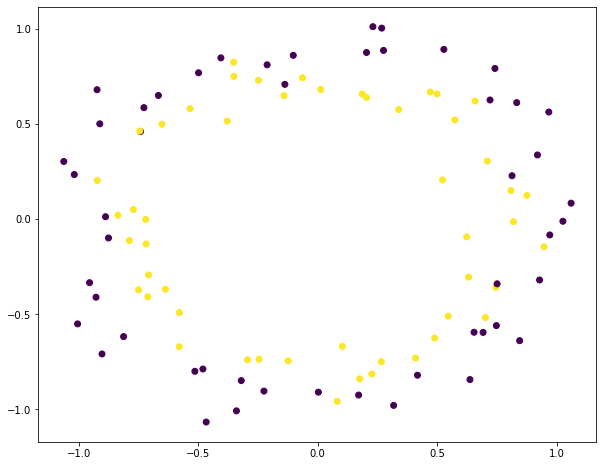

In [10]:
# Plotting Graph
plt.scatter(X[:,0], X[:,1], c=y)

In [11]:
# Splitting test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

## With Out Early Stopping

In [12]:
# Building ANN Model
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

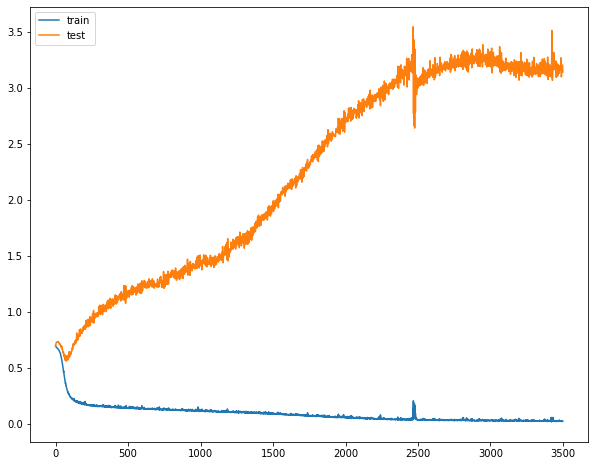

In [13]:
# Plotting Train test validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

- Observations:
    1. With increase in epoch overfitting increased in data.
    2. Overfitting Increase the loss in validation data hence Perform poorly.
    3. Reducing The no. of epoch will help in trainning Better Model

12960/12960 [==============================] - 25s 2ms/step


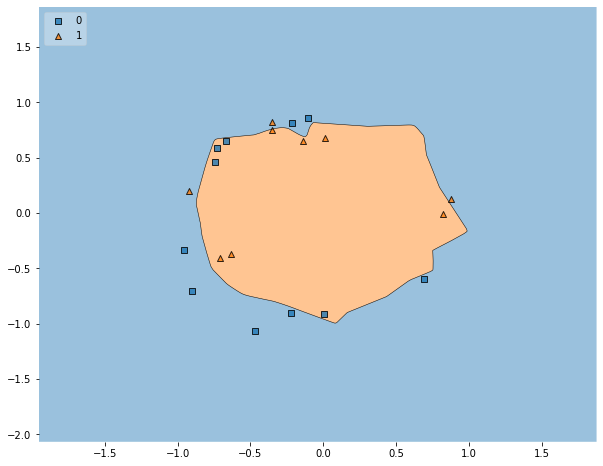

In [14]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

## Early Stopping

In [28]:
# Recreating New Model with same parameters
model1 = Sequential()

model1.add(Dense(256, input_dim=2, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Creating a Callback function
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.000001,
    patience=40,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=2, callbacks=callback)

Epoch 1/3500
3/3 - 2s - loss: 0.6987 - accuracy: 0.4625 - val_loss: 0.6897 - val_accuracy: 0.6000 - 2s/epoch - 543ms/step
Epoch 2/3500
3/3 - 0s - loss: 0.6915 - accuracy: 0.4750 - val_loss: 0.6975 - val_accuracy: 0.4500 - 65ms/epoch - 22ms/step
Epoch 3/3500
3/3 - 0s - loss: 0.6885 - accuracy: 0.5375 - val_loss: 0.7051 - val_accuracy: 0.4000 - 68ms/epoch - 23ms/step
Epoch 4/3500
3/3 - 0s - loss: 0.6873 - accuracy: 0.5500 - val_loss: 0.7102 - val_accuracy: 0.4000 - 57ms/epoch - 19ms/step
Epoch 5/3500
3/3 - 0s - loss: 0.6851 - accuracy: 0.5625 - val_loss: 0.7121 - val_accuracy: 0.4000 - 80ms/epoch - 27ms/step
Epoch 6/3500
3/3 - 0s - loss: 0.6834 - accuracy: 0.5625 - val_loss: 0.7130 - val_accuracy: 0.4000 - 64ms/epoch - 21ms/step
Epoch 7/3500
3/3 - 0s - loss: 0.6827 - accuracy: 0.5625 - val_loss: 0.7131 - val_accuracy: 0.4500 - 56ms/epoch - 19ms/step
Epoch 8/3500
3/3 - 0s - loss: 0.6805 - accuracy: 0.5500 - val_loss: 0.7145 - val_accuracy: 0.5000 - 56ms/epoch - 19ms/step
Epoch 9/3500
3/3 

Epoch 68/3500
3/3 - 0s - loss: 0.2399 - accuracy: 0.8750 - val_loss: 0.7381 - val_accuracy: 0.6500 - 104ms/epoch - 35ms/step
Epoch 69/3500
3/3 - 0s - loss: 0.2086 - accuracy: 0.9250 - val_loss: 0.7637 - val_accuracy: 0.6000 - 56ms/epoch - 19ms/step
Epoch 70/3500
3/3 - 0s - loss: 0.2346 - accuracy: 0.8625 - val_loss: 0.6987 - val_accuracy: 0.6000 - 48ms/epoch - 16ms/step
Epoch 71/3500
3/3 - 0s - loss: 0.2125 - accuracy: 0.9250 - val_loss: 0.7308 - val_accuracy: 0.7000 - 48ms/epoch - 16ms/step
Epoch 72/3500
3/3 - 0s - loss: 0.2272 - accuracy: 0.8750 - val_loss: 0.7326 - val_accuracy: 0.6500 - 40ms/epoch - 13ms/step
Epoch 73/3500
3/3 - 0s - loss: 0.1996 - accuracy: 0.9250 - val_loss: 0.7604 - val_accuracy: 0.6000 - 40ms/epoch - 13ms/step
Epoch 74/3500
3/3 - 0s - loss: 0.1965 - accuracy: 0.9375 - val_loss: 0.7683 - val_accuracy: 0.6000 - 48ms/epoch - 16ms/step
Epoch 75/3500
3/3 - 0s - loss: 0.1953 - accuracy: 0.9375 - val_loss: 0.7527 - val_accuracy: 0.6000 - 48ms/epoch - 16ms/step
Epoch 7

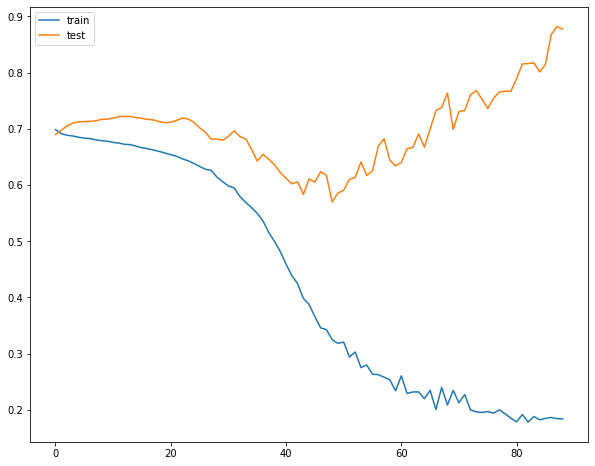

In [29]:
# Plotting Losses
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

12960/12960 [==============================] - 29s 2ms/step


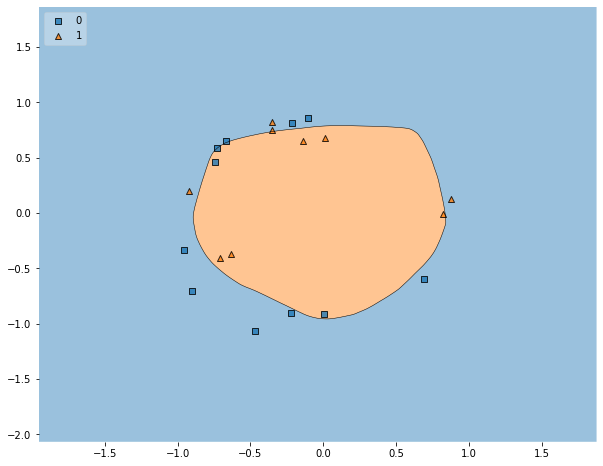

In [30]:
plot_decision_regions(X_test, y_test.ravel(), clf = model1, legend=2)
plt.show()

- Observations:
    1. Early Stopping Save Lots of time as it stop validation before complete the full epoch
    2. model did not perform best
    3. Need to apply previous best parameter to get best model 
    4. Not Showing better result